In [1]:
import os 
import tensorflow as tf 
from tensorflow import keras 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import  linear_model , datasets ,metrics
import pandas as pd 
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/lenovo/Downloads/archive (2)/diabetes.csv')
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [3]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
target = df.Outcome
data = df.iloc[:,0:7]

In [6]:
data

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


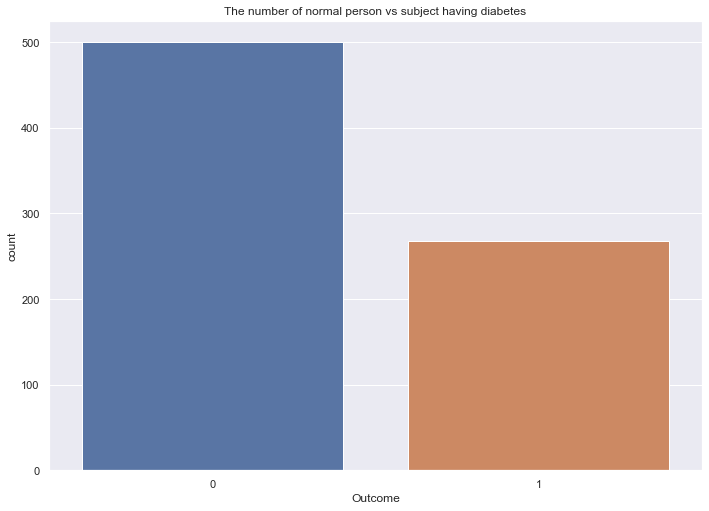

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(data=df, x='Outcome')
plt.title('The number of normal person vs subject having diabetes')
plt.show()

In [8]:
target.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

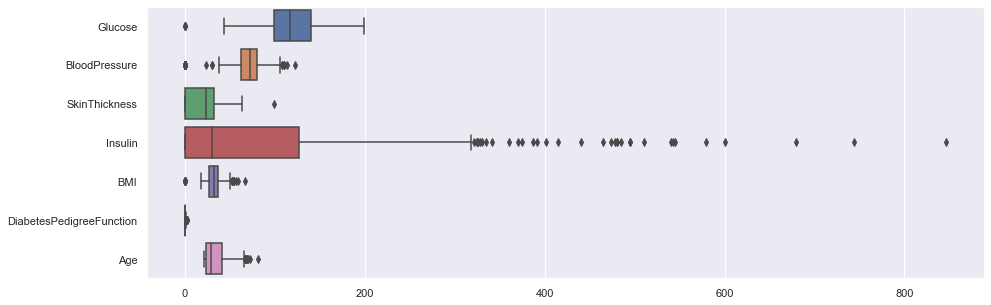

In [9]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data,orient='h')
plt.show()

In [10]:
labels = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age','DiabetesPedigreeFunction']
for i in labels :
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 +(whisker_width*IQR)
    data[i] = np.where(data[i]>upper_whisker,upper_whisker,np.where(data[i]<lower_whisker,lower_whisker,data[i]))
    print(Q1)

99.0
62.0
0.0
0.0
27.3
24.0
0.24375


In [11]:
labels = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age','DiabetesPedigreeFunction']
for i in labels :
    Q1 = data[i].quantile(0.1)
    Q3 = data[i].quantile(0.9)
    IQR = Q3 - Q1
    whisker_width = 1.5
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 +(whisker_width*IQR)
    index=data[i][(data[i]>upper_whisker)|(data[i]<lower_whisker)].index
    data.drop(index,inplace=True)
    print(Q1)

85.0
54.0
0.0
0.0
23.6
22.0
0.165


In [12]:
IQR

0.7136

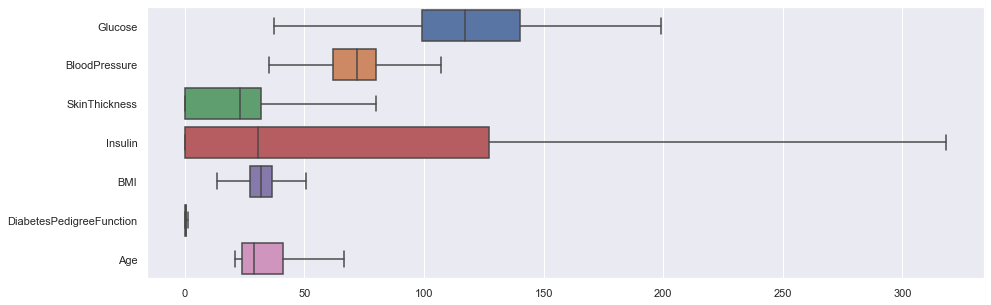

In [13]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data,orient='h')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split


In [15]:
X_train ,X_test ,Y_train,Y_test = train_test_split(data,target,test_size = 0.4,random_state = 1)

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
model = RandomForestClassifier()
model.fit(X_train,Y_train)

RandomForestClassifier()

In [18]:
model.predict(X_test)
model.score(X_test, Y_test)

0.7532467532467533

In [19]:
from sklearn.svm import SVC, LinearSVC

In [20]:
svc = SVC();
svc.fit(X_train,Y_train)
svc.predict(X_test)
svc.score(X_test, Y_test)




0.7532467532467533

In [21]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,Y_train)
Y_pred= log.predict(X_test)
log.score(X_test, Y_test)



C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.762987012987013

In [22]:
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,

In [23]:
from sklearn.metrics import classification_report
target_names = ['Diabetes', 'Normal']
print(classification_report(Y_test, Y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Diabetes       0.78      0.88      0.83       199
      Normal       0.71      0.55      0.62       109

    accuracy                           0.76       308
   macro avg       0.75      0.71      0.72       308
weighted avg       0.76      0.76      0.75       308



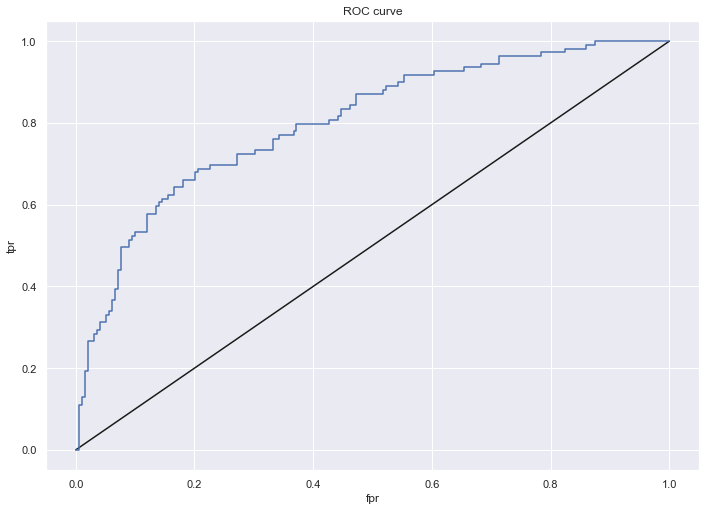

In [24]:
from sklearn.metrics import roc_curve
Y_pred_proba = log.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)
plt.plot([0,1],[0,1],'k-')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [25]:
x = {'Glucose':[85],'BloodPressure':[66],'SkinThickness': [29],'Insulin':[0],'BMI':[26.6],'DiabetesPedigreeFunction':[0.351],'Age':[31]} 
x1 = pd.DataFrame(x) 
log.predict(x1)

array([0], dtype=int64)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
KN = KNeighborsClassifier(n_neighbors = 10)
KN.fit(X_train,Y_train)
y_pred = model.predict(X_test)
KN.score(X_test,Y_test)

0.7337662337662337

In [27]:
import pickle
with open ('detection.pickle','wb') as f:
  pickle.dump(KN,f)

In [28]:
import json
columns = {
    'data_columns' :[col for col in data.columns]

}
with open("columns.json","w") as f:
  f.write(json.dumps(columns))